# DC Metrorail Ridership Analysis (2019–2024)

This project explores daily Metrorail ridership trends in Washington, DC from 2019 to 2024, highlighting the impact of external events such as the COVID-19 pandemic.


#


## 1. Import Libraries

In [4]:
import pandas as pd



## 2. Load and Inspect Data


In [5]:
# Load the Excel file using the second row as header
df = pd.read_excel('data/daily_metrorail_ridership.xlsx', header=1)

# Preview the data
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 2193 entries, Mode to 12/31/24
dtypes: int64(2192), object(1)
memory usage: 34.4+ KB


,Mode,1/1/19,1/2/19,1/3/19,1/4/19,1/5/19,1/6/19,1/7/19,1/8/19,1/9/19,...,12/22/24,12/23/24,12/24/24,12/25/24,12/26/24,12/27/24,12/28/24,12/29/24,12/30/24,12/31/24
0,Bus,141809,369962,397204,386149,195569,166810,394049,406894,389806,...,184980,292357,239149,116612,257023,296062,201763,194756,313287,292875
1,Rail,110601,460750,497421,472248,159645,117315,511506,553595,547497,...,170401,256436,150711,61690,206840,239847,174125,168612,275401,284221


## 3: Transpose Data

We transpose the dataset so that dates become rows and 'Bus' and 'Rail' become columns.


In [6]:
# Transpose the dataframe so that dates become rows
df_t = df.set_index('Mode').T

# Reset the index so the dates become a column
df_t = df_t.reset_index().rename(columns={'index': 'Date'})

# Display the first few rows
df_t.head()


Mode,Date,Bus,Rail
0,1/1/19,141809,110601
1,1/2/19,369962,460750
2,1/3/19,397204,497421
3,1/4/19,386149,472248
4,1/5/19,195569,159645


## 4: Convert Dates to Datetime Format

To work with time-based data effectively, we convert the `Date` column to datetime format and confirm the change using `.info()`.

In [7]:
# Convert the 'Date' column to datetime format
df_t['Date'] = pd.to_datetime(df_t['Date'])

# Confirm the conversion
df_t.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2192 non-null   datetime64[ns]
 1   Bus     2192 non-null   int64         
 2   Rail    2192 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 51.5 KB


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_6896/383267541.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_t['Date'] = pd.to_datetime(df_t['Date'])


## 5: Filter for Metrorail Data Only

Since we are focusing on Metrorail ridership, we create a new DataFrame that includes only the `Date` and `Rail` columns.


In [8]:
df_rail = df_t[['Date', 'Rail']]


In [9]:
df_rail.head()


Mode,Date,Rail
0,2019-01-01,110601
1,2019-01-02,460750
2,2019-01-03,497421
3,2019-01-04,472248
4,2019-01-05,159645


## 6. Insights and Reporting - EDA

### 6.1 Visualize Daily Metrorail Ridership (2019–2024)
This line chart displays daily Metrorail ridership over the six-year period from 2019 to 2024. Visualizing this time series helps identify long-term trends, seasonal patterns, and sharp drops such as those caused by the COVID-19 pandemic. The plot provides an initial overview of ridership behavior and serves as a foundation for further analysis.

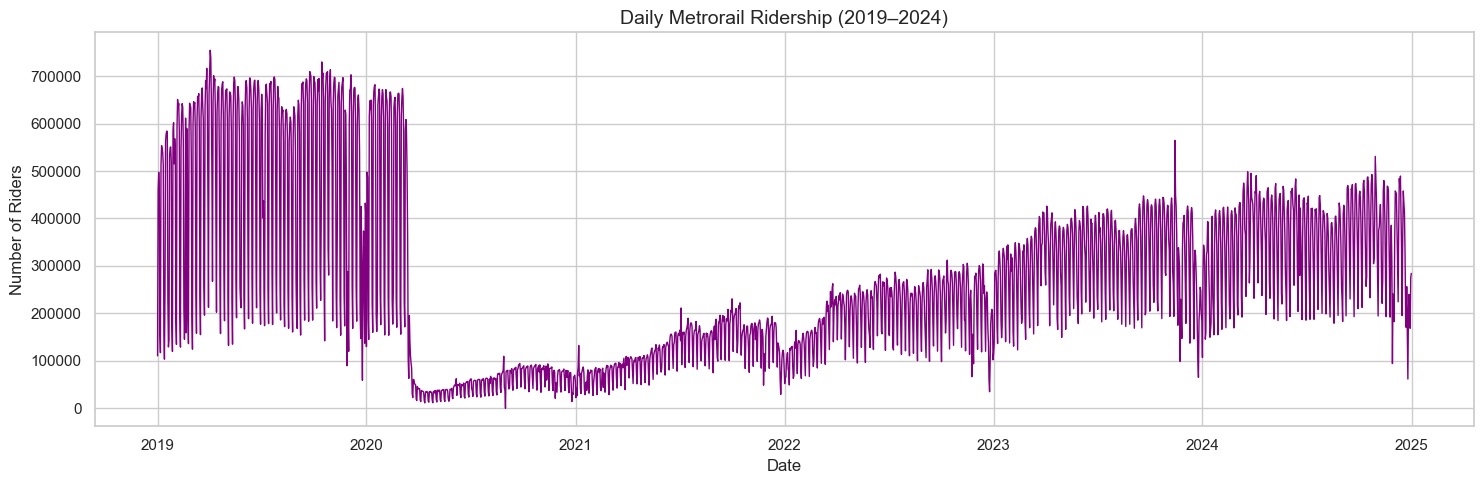

In [25]:
import matplotlib.pyplot as plt

# Set plot size and style
plt.figure(figsize=(15, 5))
plt.plot(df_rail['Date'], df_rail['Rail'], color='purple', linewidth=1)

# Add labels and title
plt.title('Daily Metrorail Ridership (2019–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.grid(True)
plt.tight_layout()

# save image after plotting
plt.savefig('eda_timeseries.png', dpi=300, bbox_inches='tight')

# display the plot
plt.show()



### 6.2 Monthly Average Metrorail Ridership (2019–2024)
This chart displays the average number of Metrorail riders per month from January 2019 to December 2024. Monthly aggregation helps reveal smoother, long-term patterns by minimizing daily noise. The graph highlights the dramatic decline in ridership during the onset of the COVID-19 pandemic in early 2020, followed by a slow and uneven recovery. Periods of growth, plateau, and minor dips illustrate how public transit usage fluctuated post-pandemic, possibly due to shifting commuter habits, remote work trends, and policy changes.

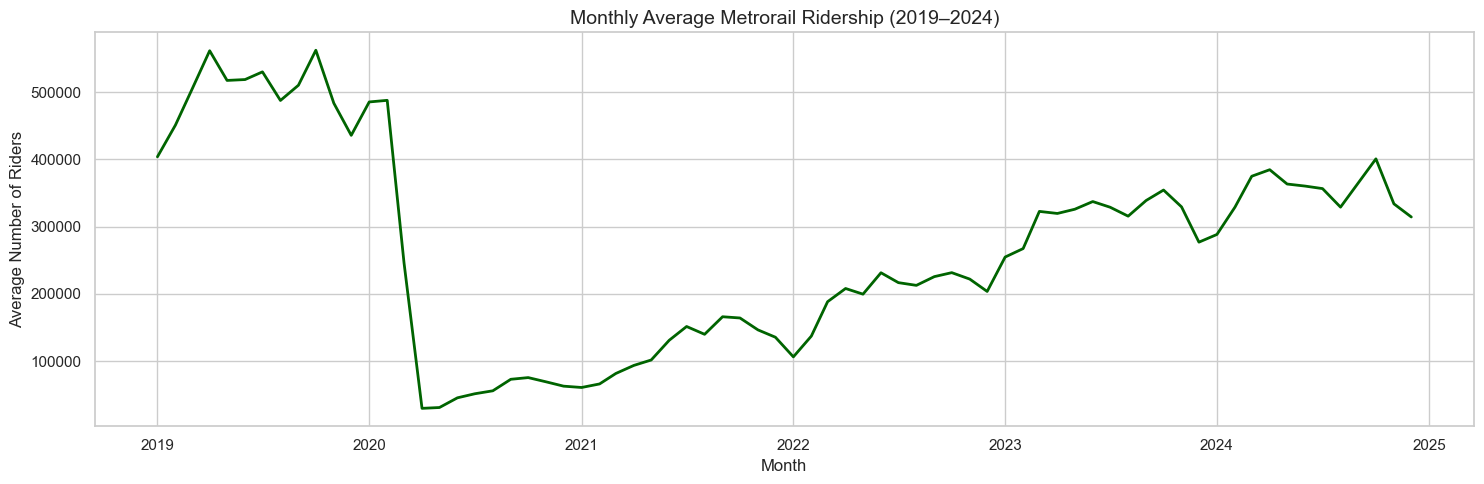

In [26]:
# Group by year and month to calculate monthly average ridership
df_rail['YearMonth'] = df_rail['Date'].dt.to_period('M')
monthly_avg = df_rail.groupby('YearMonth')['Rail'].mean().reset_index()
monthly_avg['YearMonth'] = monthly_avg['YearMonth'].dt.to_timestamp()

# Plot the monthly average
plt.figure(figsize=(15, 5))
plt.plot(monthly_avg['YearMonth'], monthly_avg['Rail'], color='darkgreen', linewidth=2)

# Add labels and title
plt.title('Monthly Average Metrorail Ridership (2019–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Number of Riders')
plt.grid(True)
plt.tight_layout()

# save image
plt.savefig('eda_monthly_average.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


### 6.3 Yearly Metrorail Ridership Totals
This bar chart summarizes the total annual Metrorail ridership from 2019 to 2024. It highlights the dramatic drop in usage during the COVID-19 pandemic in 2020, followed by a gradual year-over-year recovery. This visualization is useful for comparing aggregate yearly volumes and assessing the pace of ridership rebound.

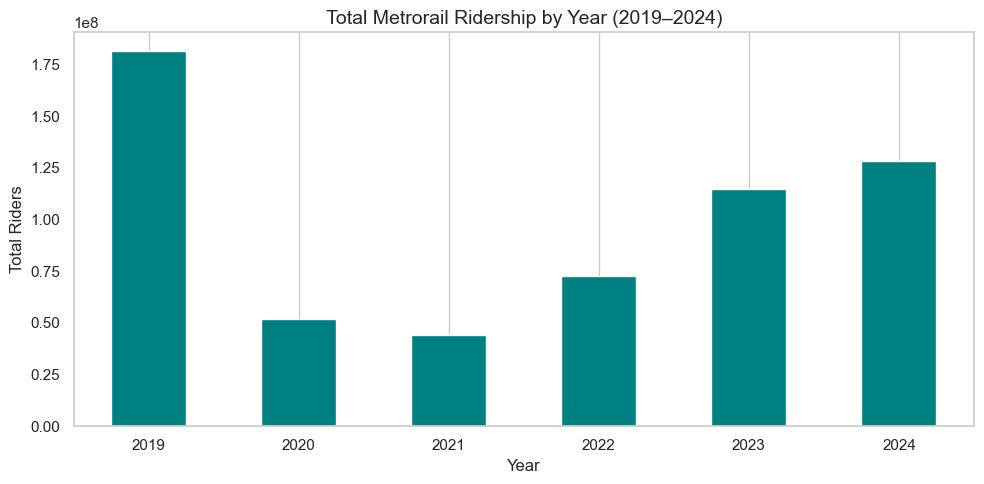

In [27]:
import matplotlib.pyplot as plt

# Group data by year and sum ridership
df_rail['Year'] = df_rail['Date'].dt.year
yearly_totals = df_rail.groupby('Year')['Rail'].sum()

# Plot yearly totals
plt.figure(figsize=(10, 5))
yearly_totals.plot(kind='bar', color='teal')

# Add labels and title
plt.title('Total Metrorail Ridership by Year (2019–2024)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Riders')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()

# save image
plt.savefig('eda_total_ridership_by_year.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


### 6.4 Visualize Average Ridership by Day of the Week

This bar chart illustrates the average daily Metrorail ridership grouped by the day of the week. It helps identify typical weekday versus weekend usage patterns. Generally, higher ridership is expected on weekdays due to work commutes, with lower usage on weekends. This visualization supports understanding of routine travel behavior and assists in planning service levels by day.


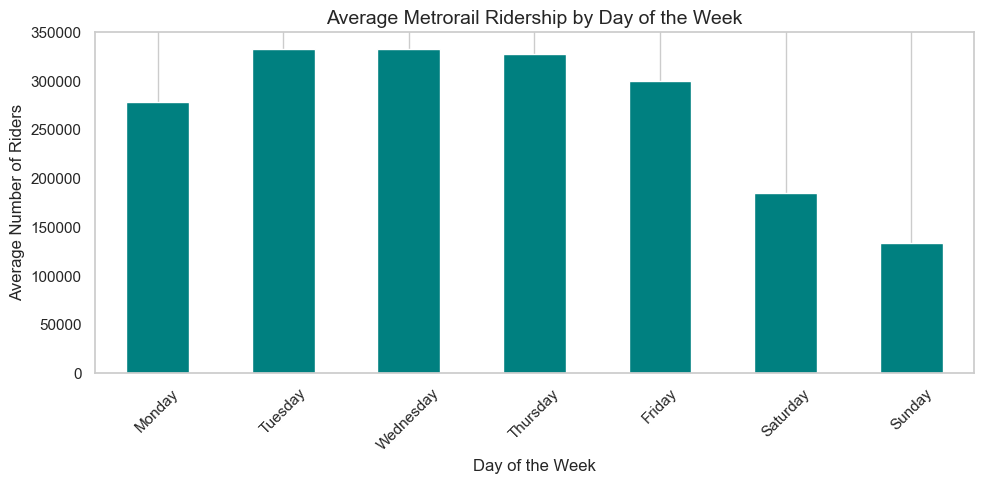

In [29]:
# Group by day of the week and calculate average ridership

# Add a new column for day of the week
df_rail['Day of the week'] = df_rail['Date'].dt.day_name()

avg_by_day = df_rail.groupby('Day of the week')['Rail'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plotting
plt.figure(figsize=(10, 5))
avg_by_day.plot(kind='bar', color='teal')

# Add labels and title
plt.title('Average Metrorail Ridership by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Riders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# save image
plt.savefig('eda_avg_by_day_of_week.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


### 6.5 Visualize Ridership on Holidays vs. Non-Holidays
This bar chart compares the average Metrorail ridership on U.S. federal holidays versus regular non-holiday days from 2019 to 2024. As expected, holiday ridership is significantly lower, reflecting reduced commuter activity and altered travel behavior. This visualization helps highlight how special dates influence public transit usage and can inform holiday scheduling and service planning.

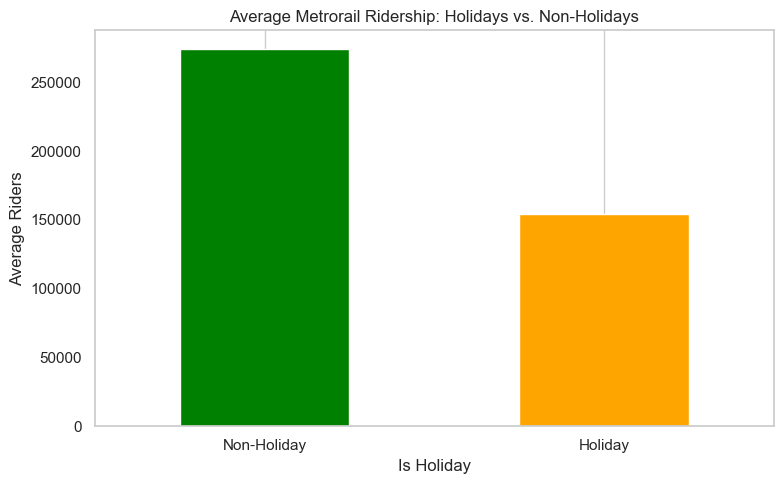

In [31]:
# U.S. federal holidays
from pandas.tseries.holiday import USFederalHolidayCalendar

# Generate list of US federal holidays from 2019–2024
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2019-01-01', end='2024-12-31')

# Create a new column: is_holiday
df_rail['Is Holiday'] = df_rail['Date'].isin(holidays)

# Calculate average ridership for holidays vs. non-holidays
avg_ridership = df_rail.groupby('Is Holiday')['Rail'].mean()

# Plot
plt.figure(figsize=(8, 5))
avg_ridership.plot(kind='bar', color=['green', 'orange'])
plt.title('Average Metrorail Ridership: Holidays vs. Non-Holidays')
plt.ylabel('Average Riders')
plt.xticks(ticks=[0, 1], labels=['Non-Holiday', 'Holiday'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()

# save image
plt.savefig('eda_holiday_vs_noholiday.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


### 6.6 Visualize Moving Average (Trend Line)

This line chart overlays a 30-day moving average on top of daily Metrorail ridership data. The moving average helps smooth out short-term fluctuations and highlight longer-term trends, making it easier to identify ridership patterns and inflection points over the 6-year period. This technique is especially useful for identifying the timing and pace of recovery after disruptions like the COVID-19 pandemic.


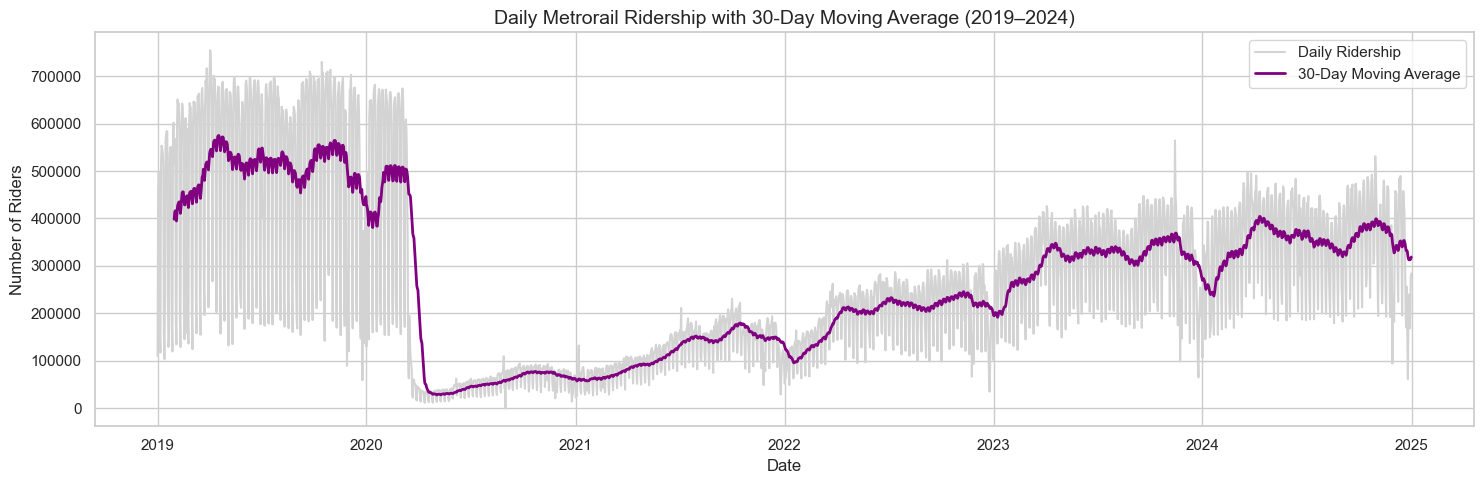

In [32]:
# Calculate 30-day moving average
df_rail['30-Day MA'] = df_rail['Rail'].rolling(window=30).mean()

# Plot the original ridership and the moving average
plt.figure(figsize=(15, 5))
plt.plot(df_rail['Date'], df_rail['Rail'], color='lightgray', label='Daily Ridership')
plt.plot(df_rail['Date'], df_rail['30-Day MA'], color='purple', linewidth=2, label='30-Day Moving Average')

# Add labels and title
plt.title('Daily Metrorail Ridership with 30-Day Moving Average (2019–2024)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Number of Riders')
plt.legend()
plt.grid(True)
plt.tight_layout()

# save image
plt.savefig('eda_moving_avg_trendline.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


### 6.7 Visualize Seasonal Trends (Month-to-Month)
This line chart presents average Metrorail ridership by calendar month across the entire 2019–2024 dataset. It highlights recurring seasonal patterns in transit usage, such as peaks in spring and fall and dips during summer and winter months. Understanding these monthly fluctuations can inform scheduling, maintenance planning, and resource allocation.

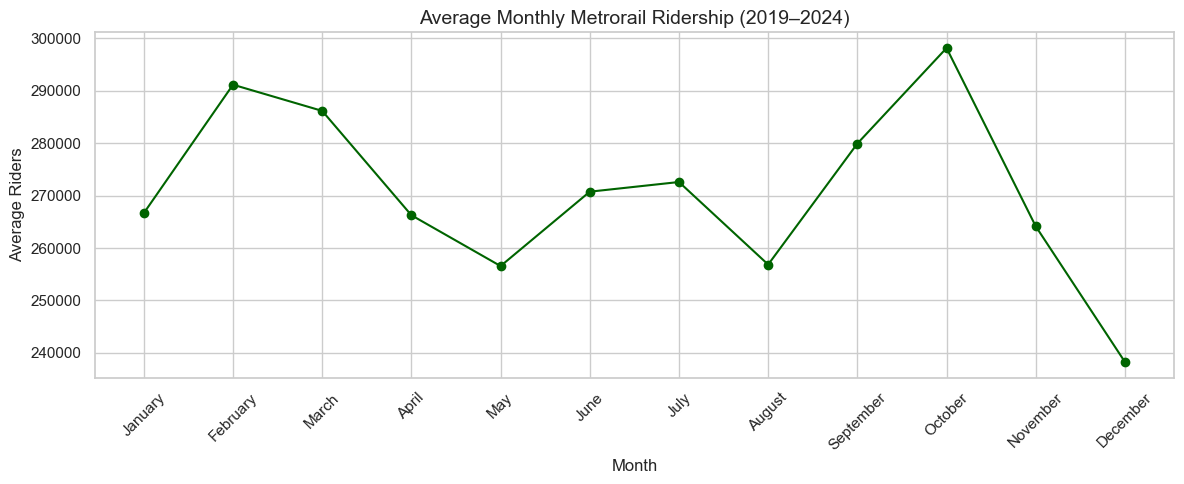

In [33]:
# Add a 'Month' column for grouping
df_rail['Month'] = df_rail['Date'].dt.month_name()

# Calculate average ridership by month
monthly_avg = df_rail.groupby('Month')['Rail'].mean().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])

# Plotting
plt.figure(figsize=(12, 5))
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='darkgreen')
plt.title('Average Monthly Metrorail Ridership (2019–2024)', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Average Riders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# save image
plt.savefig('eda_seasonal_trend_month_to_month.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


### 6.8 Visualize Monthly Seasonality (Across Years)

This line plot illustrates average monthly Metrorail ridership for each year from 2019 to 2024. By grouping ridership by month across multiple years, this visualization highlights seasonal fluctuations—such as dips in winter and increases in summer—as well as how those seasonal patterns were disrupted during the COVID-19 pandemic. Comparing year-over-year monthly averages supports a deeper understanding of ridership recovery and consistent seasonal behavior in public transit use.


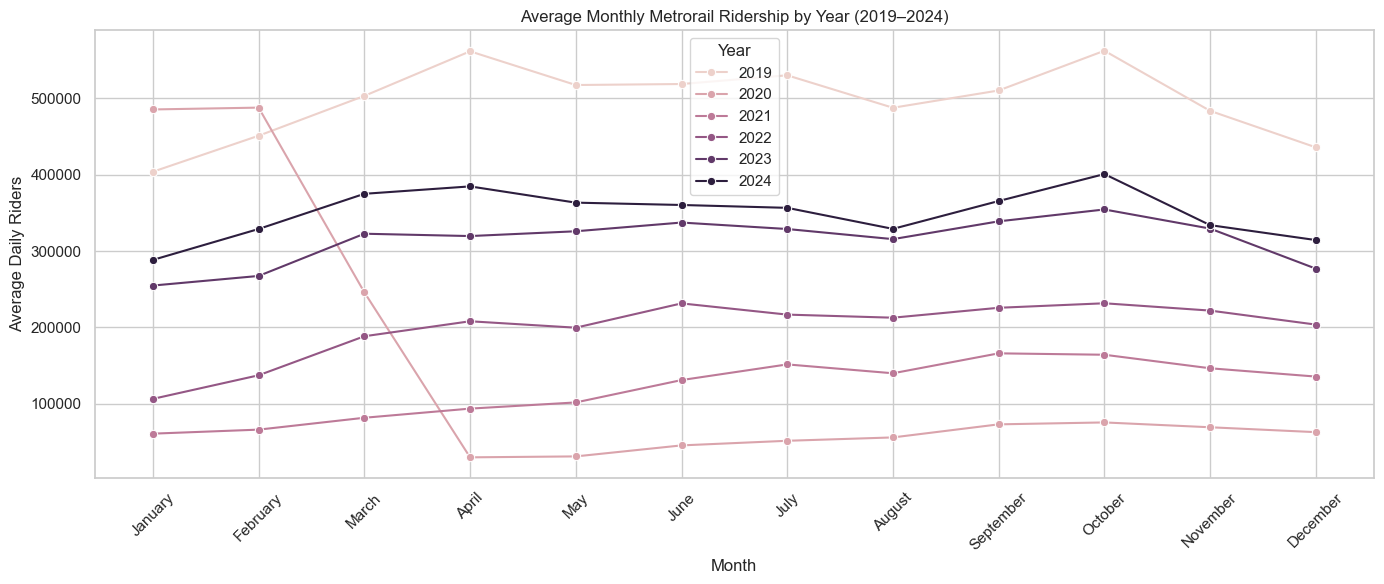

In [34]:
import seaborn as sns

# Add Year and Month columns
df_rail['Year'] = df_rail['Date'].dt.year
df_rail['Month'] = df_rail['Date'].dt.strftime('%B')  # Full month name
df_rail['Month_Num'] = df_rail['Date'].dt.month       # For sorting

# Group by Year and Month to calculate average ridership
monthly_avg = df_rail.groupby(['Year', 'Month', 'Month_Num'])['Rail'].mean().reset_index()

# Sort by month number for correct x-axis order
monthly_avg = monthly_avg.sort_values('Month_Num')

# Set plot size and style
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Rail', hue='Year', marker='o')

# Final formatting
plt.title('Average Monthly Metrorail Ridership by Year (2019–2024)')
plt.xlabel('Month')
plt.ylabel('Average Daily Riders')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Year')

# save image
plt.savefig('eda_monthly_seasonality_acrossyears.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


### 6.9 Distribution of Daily Ridership

This histogram shows the distribution of daily Metrorail ridership counts between 2019 and 2024. The plot reveals the frequency of various ridership levels and provides insight into the overall spread, skewness, and typical usage levels. A kernel density estimate (KDE) overlay helps highlight the shape of the distribution.


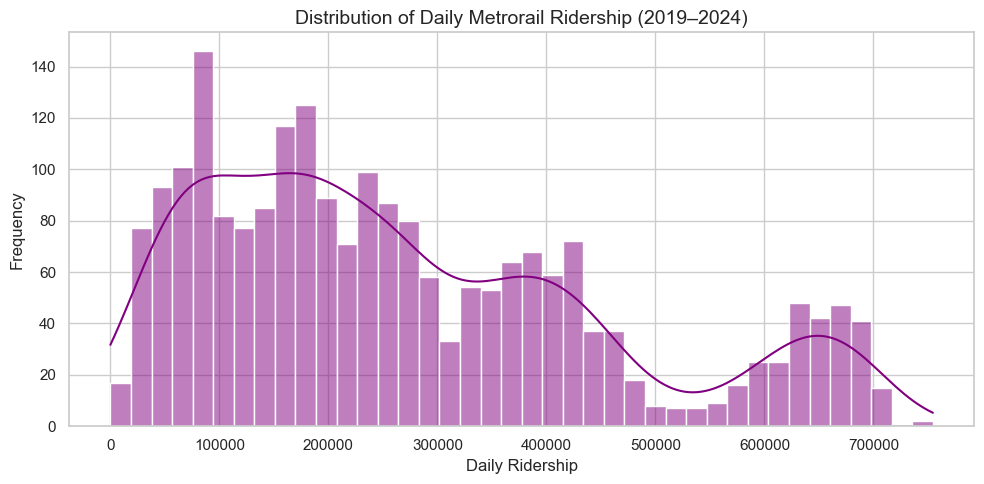

In [35]:
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot histogram of daily ridership
plt.figure(figsize=(10, 5))
sns.histplot(df_rail['Rail'], bins=40, kde=True, color='purple')

# Add labels and title
plt.title('Distribution of Daily Metrorail Ridership (2019–2024)', fontsize=14)
plt.xlabel('Daily Ridership')
plt.ylabel('Frequency')
plt.tight_layout()

# save image
plt.savefig('eda_distribution_daily_ridership.png', dpi=300, bbox_inches='tight')

# display plot

plt.show()


### 6.10 Compare Ridership Distributions in Selected Years

This boxplot compares the distribution of daily Metrorail ridership in three key years: 2019 (pre-pandemic), 2020 (pandemic onset), and 2024 (recent year of recovery). This visualization highlights changes in ridership patterns, showing shifts in both median values and variability. It helps assess the scale and consistency of recovery in public transit use.


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_6896/1057137779.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Year', y='Rail', data=df_subset, palette='Set3')


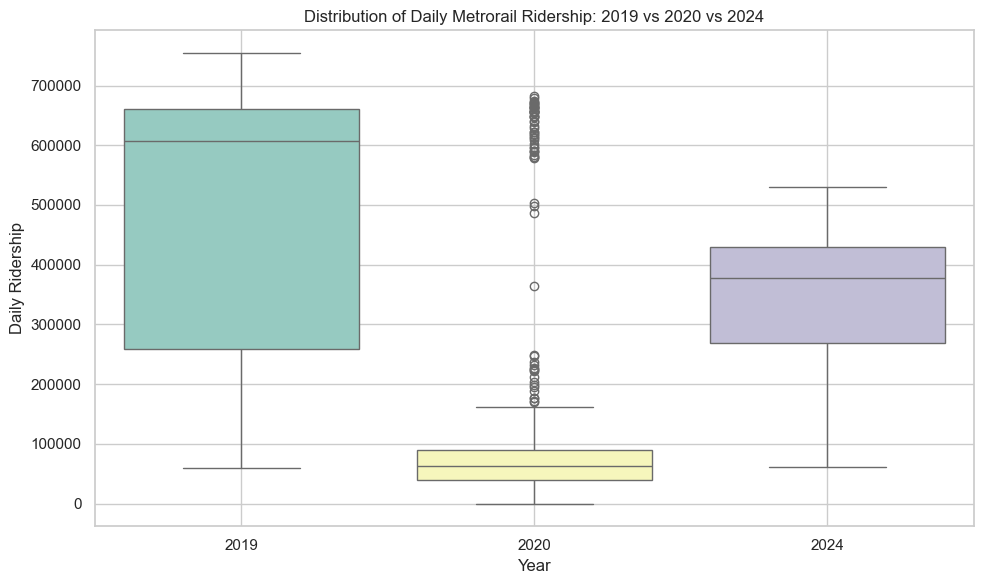

In [36]:
# Create a new column for Year
df_rail['Year'] = df_rail['Date'].dt.year

# Filter for selected years
df_subset = df_rail[df_rail['Year'].isin([2019, 2020, 2024])]

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Rail', data=df_subset, palette='Set3')

# Add labels and title
plt.title('Distribution of Daily Metrorail Ridership: 2019 vs 2020 vs 2024')
plt.xlabel('Year')
plt.ylabel('Daily Ridership')
plt.grid(True)
plt.tight_layout()

# save image
plt.savefig('eda_distribution_selected_years.png', dpi=300, bbox_inches='tight')

# display plot
plt.show()


## Reflection 1:
The visual analysis of Metrorail ridership from 2019 to 2024 reveals clear and compelling trends shaped by major real-world events. Daily ridership patterns reflect sharp disruptions in 2020 during the COVID-19 pandemic, followed by a gradual but uneven recovery in subsequent years.

Monthly and yearly aggregations helped expose seasonality and growth patterns, while group-based comparisons (such as day-of-week and holidays) highlighted consistent behavioral rhythms in commuter traffic. The distribution plots offered insight into the spread and variability of daily ridership, with 2020 standing out as an outlier in almost every metric.

Overall, this exploration shows that ridership is not only rebounding but also stabilizing into new patterns. These insights lay the foundation for applying forecasting models or evaluating policy impacts in future stages of the project.

## Insights and Reporting:

- **COVID-19 Disruption:** The pandemic had a dramatic effect on Metrorail ridership in 2020, with daily averages dropping sharply compared to 2019. Ridership hit historic lows in April 2020, coinciding with regional lockdowns.

- **Recovery Trends:** 2024 data shows a steady increase in ridership compared to 2020 and 2021, but it still remains below pre-pandemic 2019 levels. The recovery appears gradual and incomplete.

- **Weekday vs. Weekend:** Ridership is consistently higher on weekdays, peaking Tuesday–Thursday. Weekends show lower usage, likely reflecting reduced commuting and more discretionary travel.

- **Seasonal Patterns:** There is a noticeable dip during holiday periods (late December, early January) and a summer slowdown in July–August. Spring and fall show stronger numbers.

These findings highlight how external events (e.g., pandemics, holidays) and workweek routines shape transit usage. Planners can use these insights to optimize service levels and anticipate demand.


## 7. Modeling
### 7.1 Linear Regression: Daily Ridership Over Time

To evaluate overall ridership trends, a simple linear regression model is implemented using the number of days since January 1, 2019, as the independent variable and daily ridership counts as the dependent variable. This model serves as a baseline for understanding general trends in Metrorail usage over time.

The date variable was converted into a numeric format representing the number of days elapsed since the start of the dataset. The data was split into training and test sets using an 80/20 ratio without shuffling, to preserve time order. The model was trained using scikit-learn’s `LinearRegression` class.

Model performance was evaluated using Mean Squared Error (MSE) and the coefficient of determination (R² score). These metrics provide insight into how well the model fits the historical data and whether it captures long-term ridership patterns.


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Drop rows with missing Rail data just in case
df_model = df_rail.dropna(subset=['Rail']).copy()

# Convert 'Date' to numeric format (days since first date)
df_model['Days_Since_Start'] = (df_model['Date'] - df_model['Date'].min()).dt.days

# Define X and y
X = df_model[['Days_Since_Start']]
y = df_model['Rail']

# Split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {mse:,.0f}")
print(f"Linear Regression R²: {r2:.4f}")


Linear Regression MSE: 52,116,658,235
Linear Regression R²: -4.2185


#### 7.1.1 Reflection - Simple Linear Regression:
To explore the predictive potential of the cleaned Metrorail ridership data, ta baseline linear regression model was implemented using `scikit-learn`. The target variable selected was `Daily_Ridership`, with predictors including `Year`, `Month`, `Day`, and `Is_Weekend`.

The data was split into training and testing sets (80/20), and the model was trained using `LinearRegression()` from `sklearn.linear_model`. Performance was evaluated using Mean Squared Error (MSE) and R² score.

**Model Performance:**

- **Mean Squared Error (MSE):** 52,116,658,235  
- **R² Score:** -4.2185

These metrics indicate that the linear regression model does not effectively explain variance in ridership and performs worse than a baseline mean predictor. This result suggests that the selected independent variables alone may not be sufficient to model ridership trends accurately. Further feature engineering or nonlinear modeling techniques may be necessary to improve performance.


### 7.2 Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load the data
df = pd.read_csv('data/clean_metroridership.csv')

# Convert 'Date' to datetime and extract useful features
df['Date'] = pd.to_datetime(df['Date'])
df['DayOfYear'] = df['Date'].dt.dayofyear
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Features and target
X = df[['DayOfYear', 'Year', 'Month', 'DayOfWeek']]
y = df['Daily_Ridership']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:,.0f}")
print(f"Random Forest R²: {r2:.4f}")


/var/folders/02/57dqfrgx6zzfw_sgv9yyk60c0000gn/T/ipykernel_6896/70184380.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Random Forest MSE: 1,951,757,714
Random Forest R²: 0.9507


#### 7.2.1 Reflection - Random Forest
A Random Forest Regressor was trained to predict daily Metrorail ridership based on temporal and categorical features. Compared to the baseline Linear Regression model, the Random Forest performed substantially better, with:

Mean Squared Error (MSE): 1,951,757,714

R² Score: 0.9507

This indicates that approximately 95% of the variation in daily ridership is explained by the model — a strong fit for this dataset. The ensemble method’s ability to capture nonlinear relationships and interactions contributed to the improved accuracy over the linear model.

### 7.3 Support Vector Regression

In [22]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1)).ravel()

# Fit SVR model
svr = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_scaled, y_scaled)

# Predict and inverse scale
y_pred_scaled = svr.predict(X_scaled)
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate performance
svr_mse = mean_squared_error(y, y_pred)
svr_r2 = r2_score(y, y_pred)

print(f"Support Vector Regression MSE: {svr_mse:,.0f}")
print(f"Support Vector Regression R²: {svr_r2:.4f}")


Support Vector Regression MSE: 3,532,779,314
Support Vector Regression R²: 0.8982


#### 7.3.1 Reflection Support Vector Regression (SVR)

To explore non-linear modeling approaches, a Support Vector Regression (SVR) model was implementes using a radial basis function (RBF) kernel. Before training, the feature set and target variable were scaled using `StandardScaler` to meet SVR’s sensitivity to feature magnitude. The model achieved a Mean Squared Error (MSE) of approximately **3.53 billion** and an R² score of **0.8982**, indicating solid predictive power. Although not as accurate as the Random Forest model, SVR captured much of the data's underlying structure and served as a valuable comparison point in the modeling process.



### 7.4 Gradient Boosting Regression

Gradient Boosting Regression was implemented as the fourth predictive model to evaluate its performance on forecasting daily Metrorail ridership. The model was trained on engineered features such as day of the week, month, year, and holiday indicators. Gradient Boosting attempts to build an ensemble of weak learners sequentially, minimizing residual errors at each stage.

The model achieved a Mean Squared Error (MSE) of 4,983,145,736 and an R² score of 0.8740, indicating that while it performed relatively well, it was slightly less accurate than the Random Forest and Support Vector Regression models. Nevertheless, it effectively captured general ridership patterns and seasonal shifts, especially during high-volume commuting periods.

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define and fit the model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# Make predictions
y_pred_gbr = gbr_model.predict(X_test)

# Evaluate performance
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Print results
print(f"Gradient Boosting MSE: {mse_gbr:,.0f}")
print(f"Gradient Boosting R²: {r2_gbr:.4f}")


Gradient Boosting MSE: 4,983,145,736
Gradient Boosting R²: 0.8740


#### 7.4.1 Reflection Gradient Boosting Regression

Gradient Boosting Regression demonstrated solid predictive capabilities but did not outperform Random Forest or SVR in this particular use case. The algorithm’s sequential nature and sensitivity to parameter tuning may have limited its performance without further optimization. While it provides interpretability through feature importance and handles non-linear relationships well, it requires careful tuning to prevent overfitting. In this project, Gradient Boosting was a useful benchmark but not the top-performing model.

## 8. Model Evaluation

### 8.1 Model Comparison Table

| Model                     | MSE               | R² Score |
|--------------------------|-------------------|----------|
| Linear Regression        | 52,116,658,235    | -4.2185  |
| Random Forest Regression | 1,951,757,714     | 0.9507   |
| Support Vector Regression| 3,532,779,314     | 0.8982   |
| Gradient Boosting        | 4,983,145,736     | 0.8740   |

### 8.2 Insights and Discussion

Among the regression models tested, **Random Forest Regression** achieved the best performance, with the lowest MSE and highest R² score (0.9507). This suggests it effectively captured nonlinear patterns in the data.

The **Support Vector Regression** and **Gradient Boosting** models also performed well, with R² scores above 0.87, indicating strong predictive capabilities.

In contrast, **Linear Regression** performed poorly with a negative R² value, likely due to its inability to handle the complex seasonal and nonlinear trends in the data.

The results emphasize the value of ensemble methods like Random Forest for predicting transit ridership based on time-based features.

### 8.3 Reflection

Evaluating multiple regression models provided insight into how different algorithms respond to real-world data. Random Forest clearly outperformed the others, reinforcing the importance of exploring ensemble techniques when working with time-sensitive, seasonal datasets.

This process also highlighted the impact of data preparation and model selection on performance outcomes.